In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("Credit Risk.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Data Analysis

In [4]:
df.shape

(614, 13)

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [8]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [9]:
df.select_dtypes(include = ['float64','int64'])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [10]:
df.isna().sum() / df.shape[0] * 100 #we have to replace null values

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

# Missing value imputation

In [11]:
imputer = SimpleImputer(missing_values = np.nan,strategy = 'mean')

In [12]:
df['LoanAmount'] = imputer.fit_transform(df['LoanAmount'].values.reshape(-1,1))
df['Loan_Amount_Term'] = imputer.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))
df['Credit_History'] = imputer.fit_transform(df['Credit_History'].values.reshape(-1,1))

In [13]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
imputer = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent')

In [15]:
df['Gender'] = imputer.fit_transform(df['Gender'].values.reshape(-1,1))
df['Married'] = imputer.fit_transform(df['Married'].values.reshape(-1,1))
df['Dependents'] = imputer.fit_transform(df['Dependents'].values.reshape(-1,1))
df['Self_Employed'] = imputer.fit_transform(df['Self_Employed'].values.reshape(-1,1))

In [16]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


# Outlier detection

{'whiskers': [<matplotlib.lines.Line2D at 0x1554c038700>,
 'caps': [<matplotlib.lines.Line2D at 0x1554c038ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1554c038430>],
 'medians': [<matplotlib.lines.Line2D at 0x1554c05b280>],
 'fliers': [<matplotlib.lines.Line2D at 0x1554c05b550>],
 'means': []}

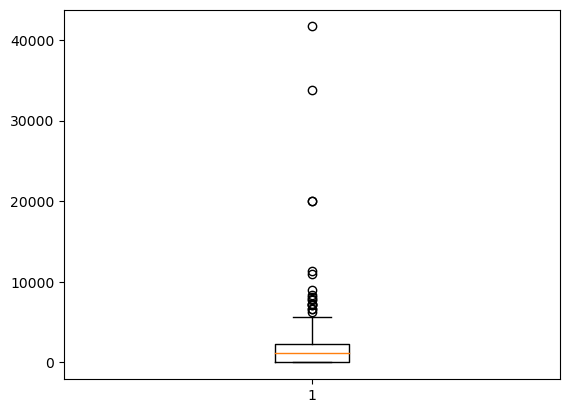

In [18]:
plt.boxplot(df['CoapplicantIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1554c0c60d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1554c0c6670>,
 'boxes': [<matplotlib.lines.Line2D at 0x1554c0b6dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1554c0c6c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1554c0c6ee0>],
 'means': []}

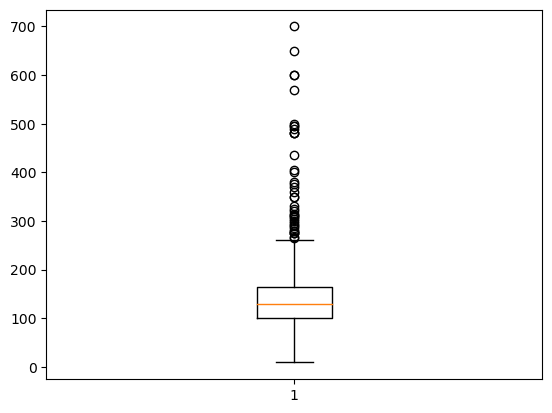

In [19]:
plt.boxplot(df['LoanAmount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1554c132490>,
 'caps': [<matplotlib.lines.Line2D at 0x1554c132a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1554c1321c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1554c132f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1554c141280>],
 'means': []}

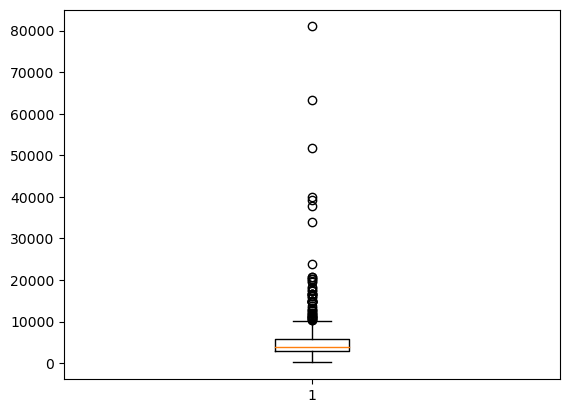

In [20]:
plt.boxplot(df['ApplicantIncome'])

In [21]:
Q1, Q3 = df['LoanAmount'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
lower, upper
df = df.loc[(df['LoanAmount'] < upper) & (df['LoanAmount'] > lower)]

In [22]:
Q1, Q3 = df['ApplicantIncome'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
lower, upper
df = df.loc[(df['ApplicantIncome'] < upper) & (df['ApplicantIncome'] > lower)]

In [23]:
Q1, Q3 = df['CoapplicantIncome'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
lower, upper
df = df.loc[(df['CoapplicantIncome'] < upper) & (df['CoapplicantIncome'] > lower)]

In [24]:
#df['LoanAmount'] = np.log(df['LoanAmount'])
#plt.boxplot(df['LoanAmount'])

In [25]:
#df['LoanAmount'].skew() #symmetric

In [26]:
#df['ApplicantIncome'] = np.log(df['ApplicantIncome'])
#df['ApplicantIncome'].skew() #symmetric

In [27]:
df.shape

(519, 13)

In [28]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


# Feature Scaling

In [29]:
scaler = StandardScaler()
df['ApplicantIncome'] = scaler.fit_transform(df['ApplicantIncome'].values.reshape(-1,1))
df['LoanAmount'] = scaler.fit_transform(df['LoanAmount'].values.reshape(-1,1))
df['CoapplicantIncome'] = scaler.fit_transform(df['CoapplicantIncome'].values.reshape(-1,1))
scaled = df[['ApplicantIncome','LoanAmount','CoapplicantIncome']]
scaled

,ApplicantIncome,LoanAmount,CoapplicantIncome
0,1.235508,0.488159,-0.952510
1,0.440562,0.063239,0.106129
2,-0.553434,-1.367611,-0.952510
3,-0.815276,-0.121387,0.702842
4,1.330324,0.363256,-0.952510
...,...,...,...
609,-0.616226,-1.252220,-0.952510
610,0.141045,-1.967645,-0.952510
611,2.631372,2.948018,-0.784026
612,2.324320,1.424855,-0.952510


# One Hot Encoding

In [30]:
ohe = OneHotEncoder()

In [31]:
df['Gender'] = ohe.fit_transform(df['Gender'].values.reshape(-1,1)).toarray()
df['Education'] = ohe.fit_transform(df['Education'].values.reshape(-1,1)).toarray()
df['Self_Employed'] = ohe.fit_transform(df['Self_Employed'].values.reshape(-1,1)).toarray()
df['Married'] = ohe.fit_transform(df['Married'].values.reshape(-1,1)).toarray()

In [32]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,1.0,0,1.0,1.0,1.235508,-0.952510,0.488159,360.0,1.0,Urban,Y
1,LP001003,0.0,0.0,1,1.0,1.0,0.440562,0.106129,0.063239,360.0,1.0,Rural,N
2,LP001005,0.0,0.0,0,1.0,0.0,-0.553434,-0.952510,-1.367611,360.0,1.0,Urban,Y
3,LP001006,0.0,0.0,0,0.0,1.0,-0.815276,0.702842,-0.121387,360.0,1.0,Urban,Y
4,LP001008,0.0,1.0,0,1.0,1.0,1.330324,-0.952510,0.363256,360.0,1.0,Urban,Y


# Label Encoder

In [33]:
label_encoder = LabelEncoder()

In [34]:
df['Property_Area'] = label_encoder.fit_transform(df['Property_Area'].values.reshape(-1,1))
df['Dependents'] = label_encoder.fit_transform(df['Dependents'].values.reshape(-1,1))

C:\Users\Riyad\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Riyad\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
df['Dependents'].value_counts()

0    311
2     89
1     81
3     38
Name: Dependents, dtype: int64

In [37]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,1.0,0,1.0,1.0,1.235508,-0.952510,0.488159,360.0,1.0,2,Y
1,LP001003,0.0,0.0,1,1.0,1.0,0.440562,0.106129,0.063239,360.0,1.0,0,N
2,LP001005,0.0,0.0,0,1.0,0.0,-0.553434,-0.952510,-1.367611,360.0,1.0,2,Y
3,LP001006,0.0,0.0,0,0.0,1.0,-0.815276,0.702842,-0.121387,360.0,1.0,2,Y
4,LP001008,0.0,1.0,0,1.0,1.0,1.330324,-0.952510,0.363256,360.0,1.0,2,Y


# Features and Target

In [38]:
X = df.drop(['Loan_Status','Loan_ID'],axis = 1)
y = df['Loan_Status']

# Modelling

In [39]:
#Logistic Regression

k = 5

Log = LogisticRegression()

kf = KFold(n_splits=k)

scores = cross_val_score(Log, X, y, cv=kf)
average_Log = scores.mean()
print("Scores for each fold:", scores)
print("Average score:", scores.mean())

Scores for each fold: [0.81730769 0.79807692 0.81730769 0.86538462 0.83495146]
Average score: 0.8266056758775205


C:\Users\Riyad\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Riyad\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

In [40]:
param = dict(penalty= ['l1','l2'],C = list(range(1,30)),solver = ['liblinear'])
grid_log = GridSearchCV(Log, param, cv=10, scoring='accuracy')
grid_log.fit(X, y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                               15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
                               27, 28, 29],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy')

In [62]:
Log_best = grid_log.best_score_
print(grid_log.best_params_)
Log_best

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


0.8266214177978883

In [42]:
#DecisionTree


k = 5

dtr = DecisionTreeClassifier()

kf = KFold(n_splits=k)

scores = cross_val_score(dtr, X, y, cv=kf)
average_DTree = scores.mean()

print("Scores for each fold:", scores)
print("Average score:", scores.mean())

Scores for each fold: [0.74038462 0.72115385 0.75961538 0.74038462 0.7184466 ]
Average score: 0.7359970126960419


In [43]:
param = dict(criterion = ['gini', 'entropy'],max_depth = [2,4,6,8,10,12])
grid_dtr = GridSearchCV(dtr, param, cv=10, scoring='accuracy')
grid_dtr.fit(X, y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12]},
             scoring='accuracy')

In [61]:
Dtr_best = grid_dtr.best_score_
print(grid_dtr.best_params_)
Dtr_best

{'criterion': 'entropy', 'max_depth': 2}


0.8246983408748114

In [51]:
#Knn

k = 5

knn = KNeighborsClassifier()

kf = KFold(n_splits=k)

scores = cross_val_score(knn, X, y, cv=kf)
average_Knn = scores.mean()
print("Scores for each fold:", scores)
print("Average score:", scores.mean())

Scores for each fold: [0.69230769 0.69230769 0.74038462 0.72115385 0.6407767 ]
Average score: 0.6973861090365945


In [52]:
k_range = list(range(1, 31))
leaf_size = list(range(1,50))
p=[1,2]
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options,leaf_size=leaf_size,p=p)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance'], 'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'p': [1, 2]}


In [53]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [54]:
Knn_best = grid.best_score_
print(grid.best_params_)
Knn_best

{'leaf_size': 1, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


0.7532051282051282

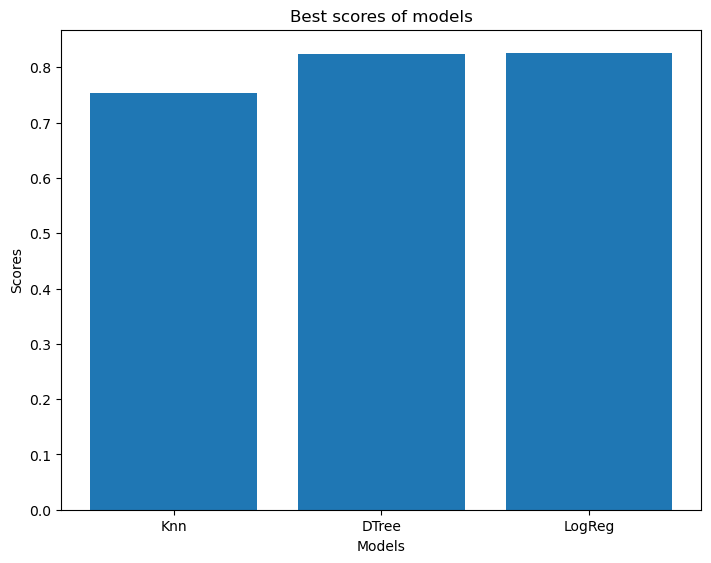

In [55]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['Knn', 'DTree', 'LogReg']
score = [Knn_best,Dtr_best,Log_best]
ax.bar(models,score)
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Best scores of models')
plt.show()


# Without GridSearchCV

In [56]:
X_train, X_test , y_train, y_test = train_test_split(X,y)

In [57]:
Knn1 = KNeighborsClassifier()
Log1 = LogisticRegression()
Dtr1 = DecisionTreeClassifier()

In [58]:
Knn1.fit(X_train,y_train)
y_pred_knn = Knn1.predict(X_test)
accuracy_score(y_test,y_pred_knn)

0.7076923076923077

In [59]:
Log1.fit(X_train,y_train)
y_pred_log = Log1.predict(X_test)
accuracy_score(y_test,y_pred_log)

C:\Users\Riyad\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.823076923076923

In [60]:
Dtr1.fit(X_train,y_train)
y_pred_dtr = Dtr1.predict(X_test)
accuracy_score(y_test,y_pred_dtr)

0.7230769230769231